-------------------------------------

**Nome: Izabela Hammerschlag** </br>

**Data: 19/09/2023**  </br>

-----------------------------------

### Projeto Proposto pelo curso da TripleTen

-----------------------------------

## Descrição do Projeto:

**A empresa de telecomunicações Megaline. A oferece aos seus cliente planos pré-pagos (Surf e Ultimate). O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.** 

**Vamos fazer uma primeira análise dos planos baseados em uma pequena seleção de clientes. Temos dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. Vamos analisar o comportamento dos clientes e tentaremos determinar quais planos pré-pagos dão mais receita.**

### Plano de trabalho:

Inicialmente, realizaremos um pré-processamento dos dados para identificar os tipos de dados em cada dataframe e analisaremos as colunas, verificando a presença de valores faltantes e duplicados. Além disso, investigaremos se há valores preenchidos de maneira incorreta, para que possam ser corrigidos, se necessário.

Em seguida, procederemos com a análise exploratória de dados, explorando as estatísticas e características dos dados, incluindo a avaliação de possíveis desequilíbrios.

A próxima etapa envolverá a divisão dos dados em conjuntos de treinamento e teste. Posteriormente, iremos treinar modelos de classificação e avaliar quais modelos obtiveram as melhores métricas.

## Descrição dos planos ofertados pela Megaline: 

### Surf

Preço mensal: $20

**cliente tem direito a:**

    500 minutos mensais

    50 mensagens de texto

    15 GB de dados

**Depois de exceder os limites do pacote:**

    1 minuto: 3 centavos

    1 mensagem de texto: 3 centavos

    1 GB de dados: $10


### Ultimate

Preço mensal: $70

**cliente tem direito a:**

    3000 minutos mensais

    1000 mensagens de texto

    30 GB de dados

**Depois de exceder os limites do pacote:**

    1 minuto: 1 centavo

    1 mensagem de texto: 1 centavo

    1 GB de dados: $7


## Contents <a id='back'></a>

* [Introdução](#intro)
* [Visão geral dos dados](#inicio)
* [Pré-processamento de dados](#predados)
* [Análise dos dados (AED)](#aed)
* [Testando hipóteses](#ttest)
* [Conclusão geral](#conclusao)

## Introdução <a id='intro'></a>

Os planos pre-pagos da empresa Megaline são: Surf e Ultimate, com o objetivo de indicar para o departamento comercial qual dos planos dão mais receita para que eles possam ajustar o orçamento de publicidade. Vamos fazer uma análise dos planos baseados em uma pequena seleção de clientes e testar hipóteses.

## Visão geral dos dados <a id='inicio'></a>

Importando as bibliotecas necessárias para a execução do projeto

In [1]:
# importando pandas como pd
import pandas as pd
import math # importando math
import numpy as np # importando Numpy com np
import matplotlib.pyplot as plt #importando matplotlib como plt

Vamos checar as primeiras 5 linhas de cada dataframe fornecido pela Megaline e informações. Assim poderemos descobrir como estão os formatos dos dados, os tipos e colunas em comuns.

In [2]:
# lendo os arquivos
df_calls = pd.read_csv('./megaline_calls.csv')
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
df_internet = pd.read_csv('./megaline_internet.csv')
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
df_messages = pd.read_csv('./megaline_messages.csv')
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
df_plans = pd.read_csv('./megaline_plans.csv')
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [9]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
df_users = pd.read_csv('./megaline_users.csv')
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Todas as tabelas (exceto df_plans que tem a descrição dos planos) tem o user_id. Então poderemos analisar por usuário cada item incluso do plano e verificar por mês a quantidade utilizada.

Na parte de info() podemos perceber que não temos dados nulos. Apenas na tabela df_users que temos uma coluna churn_date com dados nulos (se o valor for ausente, o plano estava sendo utilizado quando esse dado foi gerado).

##  Pré-processamento de dados <a id='predados'></a>

Verificando a existência de duplicatas:

In [12]:
data_megaline = [df_calls, df_internet, df_messages, df_plans, df_users]

for index in data_megaline:
    a = index.duplicated().sum()
    if a == 0:
        print('Não exitem dados duplicados')
    else:
        print(f'Existem {a} valores duplicados')

Não exitem dados duplicados
Não exitem dados duplicados
Não exitem dados duplicados
Não exitem dados duplicados
Não exitem dados duplicados


Agora vamos colocar os dados das colunas com datas para datetime que é o tipo correto para os dados que utilizamos datas

In [13]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')
df_calls.info() # verificando se mudou o Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [14]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')
df_internet.info() # verificando se mudou o Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')
df_messages.info() # verificando se mudou o Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')
df_users.info() # verificando se mudou o Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Vamos adicionar novas colunas dos meses referentes as datas para cada dataframe:

In [17]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.sample(3)

,id,user_id,call_date,duration,month
54344,1196_227,1196,2018-02-28,0.00,2
71397,1254_328,1254,2018-08-28,9.24,8
82281,1298_27,1298,2018-12-29,2.76,12


In [18]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.sample(3)

,id,user_id,session_date,mb_used,month
17203,1077_323,1077,2018-10-09,569.74,10
101118,1479_48,1479,2018-11-27,304.19,11
69369,1324_84,1324,2018-11-01,235.62,11


In [19]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.sample(3)

,id,user_id,message_date,month
34920,1223_8,1223,2018-11-26,11
53224,1339_358,1339,2018-11-16,11
69456,1451_153,1451,2018-09-01,9


In [20]:
df_users['month'] = df_users['reg_date'].dt.month
df_users.sample(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
268,1268,Britni,Bowers,33,"Fresno, CA MSA",2018-01-13,surf,NaN,1
444,1444,Glinda,Dickerson,70,"New Haven-Milford, CT MSA",2018-06-20,surf,NaN,6
342,1342,Eugene,Patton,65,"Indianapolis-Carmel-Anderson, IN MSA",2018-10-21,surf,NaN,10


Para fazer a análise e comparar os dois planos oferecidos pela empresa precisamos encontrar o número de chamadas feitas e minutos utilizados por mês, o número de mensagens de texto enviadas por mês, o volume de dados por mês e a receita mensal para cada usuário. 

Para isso, vamos olhar de perto com o describe os dados de cada coluna que precisaremos para descobrir se existem valores discrepantes e se precisaremos tratar esses dados primeiro antes de executar qualquer calculo.

### df_calls:

In [21]:
df_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


In [22]:
df_calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [23]:
df_calls['duration'].value_counts()

0.00     26834
4.02       102
8.37       102
3.91       101
4.30       100
         ...  
31.55        1
24.95        1
26.23        1
29.56        1
25.18        1
Name: duration, Length: 2802, dtype: int64

No caso de duração de 0 minutos podemos considerar como chamadas perdidas, se retirarmos esses dados pode afetar  cálculo da receita da Megaline.

### df_internet:

In [24]:
df_internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


In [25]:
df_internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [26]:
df_internet['mb_used'].value_counts()

0.00      13747
435.77        8
414.46        8
423.06        7
417.46        7
          ...  
814.65        1
168.15        1
102.41        1
449.36        1
758.31        1
Name: mb_used, Length: 57624, dtype: int64

Seguindo a mesma linha de raciocínio no df_calls não vamos retirar os valores nulos.

### df_messages:

In [27]:
df_messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


In [28]:
df_messages['id'].describe()

count        76051
unique       76051
top       1000_125
freq             1
Name: id, dtype: object

No caso das menssagens de texto podemos descobrir quantas mensagens foram enviadas pela soma do id para cada user_id no mês.

### Usuários (informações para analise):

**Número de chamadas feitas por usuário e total de minutos por mês:**

In [29]:
df_calls['rounded_duration'] = df_calls['duration'].apply(lambda x: math.ceil(x))
df_calls

,id,user_id,call_date,duration,month,rounded_duration
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,9
137731,1499_200,1499,2018-10-20,10.89,10,11
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,10,1


In [30]:
user_duration_calls = df_calls.groupby(['user_id','month']).sum()

In [31]:
user_duration_calls

duration  rounded_duration
user_id month                            
1000    12       116.83               124
1001    8        171.14               182
        9        297.69               315
        10       374.11               393
        11       404.59               426
...                 ...               ...
1498    12       324.77               339
1499    9        330.37               346
        10       363.28               385
        11       288.56               308
        12       468.10               496

[2258 rows x 2 columns]

In [32]:
user_count_calls = df_calls.groupby(['user_id','month'])['id'].count()

In [33]:
user_count_calls

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64

**Número de mensagens de texto enviadas por mês:**

In [34]:
user_count_messages = df_messages.groupby(['user_id','month'])['id'].count()

In [35]:
user_count_messages

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64

**O volume de dados por mês:**

In [36]:
user_mb_internet = df_internet.groupby(['user_id','month'])['mb_used'].sum()

In [37]:
user_mb_internet

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64

In [38]:
user_gb_internet = user_mb_internet/1024

In [39]:
user_gb_internet = user_gb_internet.apply(lambda x: math.ceil(x))

In [40]:
user_gb_internet

user_id  month
1000     12        2
1001     8         7
         9        14
         10       22
         11       19
                  ..
1498     12       23
1499     9        13
         10       20
         11       17
         12       22
Name: mb_used, Length: 2277, dtype: int64

**A receita mensal para cada usuário:**

Vamos encontrar a receita mensal de cada usuário com esses passos: subtraindo o limite do pacote grátis do número total de chamadas, mensagens de texto, e dados; multiplicando o resultado pelos valores do plano; adicionando o preço mensal dependendo do plano de chamada.

In [41]:
df_users_ultimate = df_users[df_users['plan']  == 'ultimate']
df_users_ultimate.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
347,1347,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",2018-06-17,ultimate,NaN,6
453,1453,Robt,Tyler,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-09,ultimate,NaN,7
158,1158,Robin,Thornton,20,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-11-30,ultimate,NaN,11
487,1487,Elton,Simpson,18,"Cape Coral-Fort Myers, FL MSA",2018-08-16,ultimate,NaN,8
202,1202,Osvaldo,Mayer,36,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-09-30,ultimate,NaN,9


In [42]:
df_users_surf = df_users[df_users['plan']  == 'surf']
df_users_surf.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,6
97,1097,Deandre,Powell,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-26,surf,NaN,2
51,1051,Rosario,Gibbs,55,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-12-11,surf,NaN,12
198,1198,Russ,Horne,69,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-01,surf,NaN,5
217,1217,Ned,Thomas,69,"Dayton-Kettering, OH MSA",2018-06-04,surf,NaN,6


**Para os usuários que assinaram o plano Surf:**

- preço: $20

Tem direito a:

- 500 minutos

- 50 mensagens

- 15 GB

excedido isso: 

- 1min: 3 centavos

- 1 mensagem: 3 centavos

- 1GB: $10


In [43]:
#user_duration_calls
#user_gb_internet
#user_count_messages

In [44]:
user_surf = pd.DataFrame(df_users_surf['user_id'])
user_surf

,user_id
1,1001
2,1002
3,1003
4,1004
5,1005
...,...
494,1494
495,1495
496,1496
498,1498


In [45]:
surf = user_surf.merge(user_duration_calls.reset_index(), on='user_id')
surf = surf.drop(columns=['duration'])
surf = surf.merge(user_gb_internet.reset_index(), on=['user_id','month'])
surf = surf.merge(user_count_messages.reset_index(), on=['user_id','month'])

In [46]:
def calc_surf_min(x):
    return max(0, x - 500)*0.03

def calc_surf_messages(x):
    return max(0, x - 50)*0.03

def calc_surf_gb(x):
    return max(0, x - 15)*10

In [47]:
surf['extra_money_min'] = surf['rounded_duration'].apply(calc_surf_min)
surf['extra_money_messages'] = surf['id'].apply(calc_surf_messages)
surf['extra_money_gb'] = surf['mb_used'].apply(calc_surf_gb)

surf['monthly_bill'] = 20 + surf['extra_money_min'] + surf['extra_money_messages'] + surf['extra_money_gb']
surf

,user_id,month,rounded_duration,mb_used,id,extra_money_min,extra_money_messages,extra_money_gb,monthly_bill
0,1001,8,182,7,30,0.0,0.00,0,20.00
1,1001,9,315,14,44,0.0,0.00,0,20.00
2,1001,10,393,22,53,0.0,0.09,70,90.09
3,1001,11,426,19,36,0.0,0.00,40,60.00
4,1001,12,412,19,44,0.0,0.00,40,60.00
...,...,...,...,...,...,...,...,...,...
1175,1496,8,122,9,2,0.0,0.00,0,20.00
1176,1496,9,414,17,21,0.0,0.00,20,40.00
1177,1496,10,317,14,18,0.0,0.00,0,20.00
1178,1496,11,308,9,13,0.0,0.00,0,20.00


**Para os usuários que assinaram o plano Ultimate:**

- preço: $70

Tem direito a:

- 3000 minutos

- 1000 mensagens

- 30 GB

excedido isso: 

- 1min: 1 centavos

- 1 mensagem: 1 centavos

- 1GB: $7

In [48]:
user_ultimate = pd.DataFrame(df_users_ultimate['user_id'])
user_ultimate

,user_id
0,1000
6,1006
8,1008
11,1011
13,1013
...,...
482,1482
487,1487
490,1490
493,1493


In [49]:
ultimate = user_ultimate.merge(user_duration_calls.reset_index(), on='user_id')
ultimate = ultimate.drop(columns=['duration'])
ultimate = ultimate.merge(user_gb_internet.reset_index(), on=['user_id','month'])
ultimate = ultimate.merge(user_count_messages.reset_index(), on=['user_id','month'])

In [50]:
def calc_ultimate_min(x):
    return max(0, x - 3000)*0.01

def calc_ultimate_messages(x):
    return max(0, x - 1000)*0.01

def calc_ultimate_gb(x):
    return max(0, x - 30)*7

In [51]:
ultimate['extra_money_min'] = ultimate['rounded_duration'].apply(calc_surf_min)
ultimate['extra_money_messages'] = ultimate['id'].apply(calc_surf_messages)
ultimate['extra_money_gb'] = ultimate['mb_used'].apply(calc_surf_gb)

ultimate['monthly_bill'] = 70 + ultimate['extra_money_min'] + ultimate['extra_money_messages'] + ultimate['extra_money_gb']
ultimate

,user_id,month,rounded_duration,mb_used,id,extra_money_min,extra_money_messages,extra_money_gb,monthly_bill
0,1000,12,124,2,11,0.00,0.00,0,70.00
1,1006,11,10,3,15,0.00,0.00,0,70.00
2,1006,12,59,32,139,0.00,2.67,170,242.67
3,1008,10,476,17,21,0.00,0.00,20,90.00
4,1008,11,446,24,37,0.00,0.00,90,160.00
...,...,...,...,...,...,...,...,...,...
574,1478,12,376,23,14,0.00,0.00,80,150.00
575,1482,11,785,20,87,8.55,1.11,50,129.66
576,1482,12,56,1,5,0.00,0.00,0,70.00
577,1487,12,416,14,66,0.00,0.48,0,70.48


## Análise dos dados <a id='aed'></a>

**Observando o comportamento dos clientes para o plano surf e o plano Ultimate.**

Para isso, vamos olhar cada coluna, são elas: O tempo de duração das chamadas por mês (rounded_duration), a quantidade de mensagens enviadas por mês (id), e a quantidade em gigas usados por mês (mb_used).

**tempo de duração das chamadas por mês:**

In [52]:
ultimate['rounded_duration'].describe()

count     579.000000
mean      442.512953
std       249.576439
min         0.000000
25%       262.500000
50%       424.000000
75%       582.500000
max      1369.000000
Name: rounded_duration, dtype: float64

<AxesSubplot:>

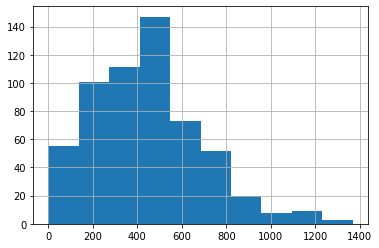

In [53]:
ultimate['rounded_duration'].hist()

In [54]:
surf['rounded_duration'].describe()

count    1180.000000
mean      445.775424
std       235.205044
min         2.000000
25%       288.000000
50%       439.000000
75%       587.250000
max      1510.000000
Name: rounded_duration, dtype: float64

<AxesSubplot:>

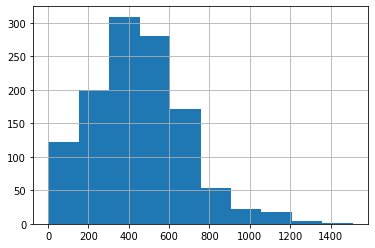

In [55]:
surf['rounded_duration'].hist()

O plano ultimate oferta 3000 minutos de chamadas por mês, enquanto o plano surf oferta 500 minutos, mas o comportamento dos usuários de ambos os planos tem uma média de 442-446 min por mês. Podemos perceber também que os usuários do plano surf tem valores mais discrepantes, sendo a chamada de duração mínima de 2 minutos e máxima de 1510, um valor bem acima do ofertado no plano, por exemplo. Se olharmos para os quartis podemos observar que os usuários do surf tem valores mais altos.

**Quantidade de mensagens por mês:**

In [56]:
ultimate['id'].describe()

count    579.000000
mean      46.455959
std       32.930135
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: id, dtype: float64

<AxesSubplot:>

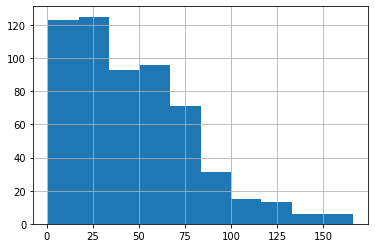

In [57]:
ultimate['id'].hist()

In [58]:
surf['id'].describe()

count    1180.000000
mean       39.489831
std        32.314360
min         1.000000
25%        16.000000
50%        32.000000
75%        53.000000
max       266.000000
Name: id, dtype: float64

<AxesSubplot:>

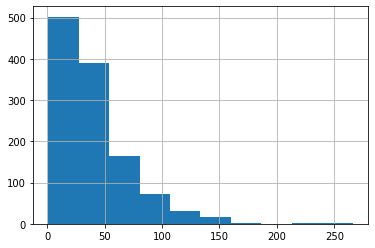

In [59]:
surf['id'].hist()

O plano ultimate oferta 1000 mensagens por mês, enquanto o plano surf oferta 50 mensagens. Podemos observar uma média de mensagens enviadas por mês é menor em surf (surf média ~= 40, ultimate média ~= 47). Ainda sim, os valores dos usuários do plano surf continuam sendo os mais discrepantes, tendo seu valor máximo 266 mensagens, enquanto ultimate tem um valor máximo de 166. Enquanto aos quartis os valores das divisões em quartis são maiores para ultimate. Nos histogramas podemos observar que a distribuição para o plano surf é mais centrada, com alguns pontos discrepantes, a distribuição do ultimate tem uma cauda a direita.

**Agora vamos olhar para o volume de internet utilizada por mês pelos usuários:**

In [60]:
ultimate['mb_used'].describe()

count    579.000000
mean      17.343696
std        7.494935
min        1.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: mb_used, dtype: float64

<AxesSubplot:>

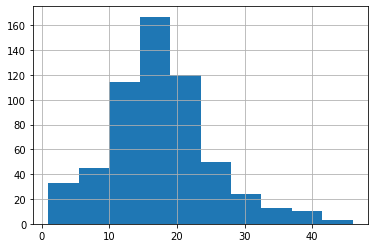

In [61]:
ultimate['mb_used'].hist()

In [62]:
surf['mb_used'].describe()

count    1180.000000
mean       16.752542
std         7.550662
min         1.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: mb_used, dtype: float64

<AxesSubplot:>

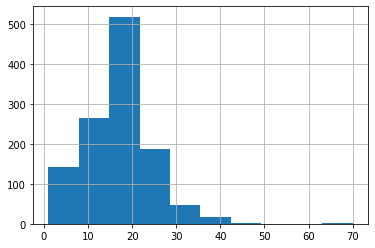

In [63]:
surf['mb_used'].hist()

O plano ultimate oferta 30Gb de internet por mês, enquanto o plano surf oferta 15Gb. Podemos observar que a média de Gb utilizados por mês é maior nos clientes ultimate. Os valores dos usuários do plano surf são mais variados tendo seu valor máximo 70 Gb, enquanto ultimate tem um valor máximo de 46. Enquanto aos quartis, os valores das divisões em quartis são iguais.

Obs1: ao utilizar o describe() nós já temos os valores da média (mean), mediana (50%), quartis (25%/50%/75%), valor máximo (max) e mínimo (min) e o número do espaço amostral (count).

Podemos analisar também as médias dos valores adicionais a serem pagos por ultrapassarem o limite do plano. Além da conta final que o usuário deverá pagar ao final de cada mês.

Calculando as médias:

In [64]:
ultimate['extra_money_min'].mean() # média do valor extra de minutos por mês do plano ultimate

2.1993782383419687

In [65]:
surf['extra_money_min'].mean() # média do valor extra de minutos por mês do plano surf

2.0314067796610167

In [66]:
ultimate['extra_money_min'].mean() - surf['extra_money_min'].mean() # diferença entre as médias dos planos

0.16797145868095198

Podemos observar uma média de aproximadamente 17 centavos de diferença, sendo o plano ultimate com a média maior a ser paga pelos usuários.

In [67]:
ultimate['extra_money_messages'].mean() # média do valor extra de mensagens por mês do plano ultimate

0.3515025906735751

In [68]:
surf['extra_money_messages'].mean() # média do valor extra de mensagens por mês do plano surf

0.25731355932203387

In [69]:
ultimate['extra_money_messages'].mean() - surf['extra_money_messages'].mean() # diferença entre as médias dos planos

0.09418903135154122

Podemos observar uma média de quase 10 centavos de diferença, sendo o plano ultimate com a média maior a ser paga pelos usuários.

In [70]:
ultimate['extra_money_gb'].mean() # média do valor extra de internet por mês do plano ultimate

40.75993091537133

In [71]:
surf['extra_money_gb'].mean() # média do valor extra de internet por mês do plano surf

38.1271186440678

In [72]:
ultimate['extra_money_gb'].mean() - surf['extra_money_gb'].mean() # diferença entre as médias dos planos

2.6328122713035285

Podemos observar uma média de 2 reais de diferença, sendo o plano ultimate com a média maior a ser paga pelos usuários.

In [73]:
ultimate['monthly_bill'].mean() # média da conta final dos usuários por mês, referente ao plano ultimate

113.31081174438685

In [74]:
extra_ultimate_bill = ultimate['monthly_bill'].mean() - 70 # diferença entre o valor total do valor do plano 
extra_ultimate_bill

43.310811744386854

In [75]:
surf['monthly_bill'].mean() # média da conta final dos usuários por mês, referente ao plano surf

60.41583898305085

In [76]:
extra_surf_bill = surf['monthly_bill'].mean() - 20 # diferença entre o valor total do valor do plano
extra_surf_bill 

40.41583898305085

In [77]:
extra_surf_bill/extra_ultimate_bill # uma diferença de 7% do valor extra a ser pago comparando 
                                    # com o valor extra a ser pago dos planos.

0.9331581966548756

In [78]:
ultimate['monthly_bill'].mean()/70 # olhando para o valor de 70 reais do plano contratado, quem assinou o plano ultimate 
                                # em média paga 1.6 x o valor contratado.

1.6187258820626693

In [79]:
surf['monthly_bill'].mean()/20 # olhando para o valor de 20 reais do plano contratado, quem assinou o plano surf
                             # em média paga 3 x o valor contratado.

3.0207919491525423

Fizemos algumas analises olhando apenas para os valores médios, mas precisamos de um embasamento estatístico para tirarmos conclusões.

**Calculando a variância e o desvio padrão:**

Para as chamadas por mês:

In [80]:
duration_call_ultimate = ultimate['rounded_duration']
variance_call_ultimate = np.var(duration_call_ultimate)
print(f'Variância das chamadas: {variance_call_ultimate}')
standard_deviation_call_ultimate = np.std(duration_call_ultimate)
print(f'Desvio Padrão das chamadas: {standard_deviation_call_ultimate}')

Variância das chamadas: 62180.81978039679
Desvio Padrão das chamadas: 249.36082246495096


In [81]:
duration_call_surf = surf['rounded_duration']
variance_call_surf = np.var(duration_call_surf)
print(f'Variância das chamadas: {variance_call_surf}')
standard_deviation_call_surf = np.std(duration_call_surf)
print(f'Desvio Padrão das chamadas: {standard_deviation_call_surf}')

Variância das chamadas: 55274.530073972994
Desvio Padrão das chamadas: 235.10535951775535


Para as mensagens por mês:

In [82]:
messages_ultimate = ultimate['id']
variance_messages_ultimate = np.var(messages_ultimate)
print(f'Variância das mensagens: {variance_messages_ultimate}')
standard_deviation_messages_ultimate = np.std(messages_ultimate)
print(f'Desvio Padrão das mensagens: {standard_deviation_messages_ultimate}')

Variância das mensagens: 1082.5209446338606
Desvio Padrão das mensagens: 32.901686045457616


In [83]:
messages_surf = surf['id']
variance_messages_surf = np.var(messages_surf)
print(f'Variância das mensagens: {variance_messages_surf}')
standard_deviation_messages_surf = np.std(messages_surf)
print(f'Desvio Padrão das mensagens: {standard_deviation_messages_surf}')

Variância das mensagens: 1043.3329474288998
Desvio Padrão das mensagens: 32.300664814039045


Para a internet por mês:

In [84]:
gb_ultimate = ultimate['mb_used']
variance_gb_ultimate = np.var(gb_ultimate)
print(f'Variância de gb: {variance_gb_ultimate}')
standard_deviation_gb_ultimate = np.std(gb_ultimate)
print(f'Desvio Padrão de gb: {standard_deviation_gb_ultimate}')

Variância de gb: 56.077037116581806
Desvio Padrão de gb: 7.488460263404074


In [85]:
gb_surf = surf['mb_used']
variance_gb_surf = np.var(gb_surf)
print(f'Variância de gb: {variance_gb_surf}')
standard_deviation_gb_surf = np.std(gb_surf)
print(f'Desvio Padrão de gb: {standard_deviation_gb_surf}')

Variância de gb: 56.964188451594374
Desvio Padrão de gb: 7.547462384907551


Para a fatura final por mês:

In [86]:
bill_ultimate_users = ultimate['monthly_bill']
variance_bill_ultimate = np.var(bill_ultimate_users)
print(f'Variância da fatura: {variance_bill_ultimate}')
standard_deviation_bill_ultimate = np.std(bill_ultimate_users)
print(f'Desvio Padrão da fatura: {standard_deviation_bill_ultimate}')

Variância da fatura: 3242.370704867841
Desvio Padrão da fatura: 56.94181859466592


In [87]:
bill_ultimate_users = surf['monthly_bill']
variance_bill_surf = np.var(bill_ultimate_users)
print(f'Variância da fatura: {variance_bill_surf}')
standard_deviation_bill_surf = np.std(bill_ultimate_users)
print(f'Desvio Padrão da fatura: {standard_deviation_bill_surf}')

Variância da fatura: 2870.068890567294
Desvio Padrão da fatura: 53.5730239072548


Vamos construir os gráficos para analisarmos visualmente os nossos dados

**Histogramas**

array([[<AxesSubplot:title={'center':'rounded_duration'}>]], dtype=object)

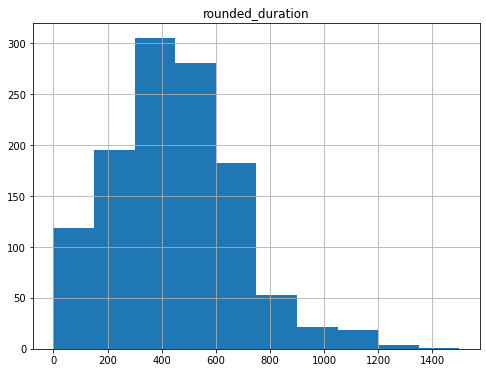

In [88]:
surf.hist(column='rounded_duration',bins=10,range=(0,1500),figsize=(8,6)) #histograma para a duração de chamadas

array([[<AxesSubplot:title={'center':'rounded_duration'}>]], dtype=object)

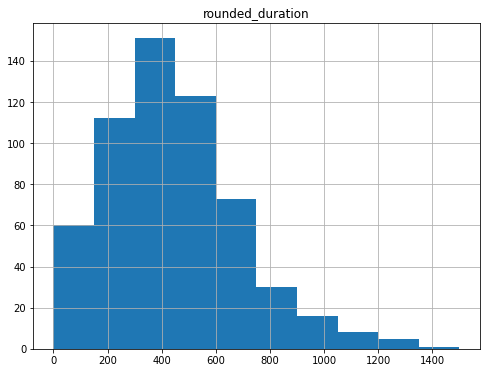

In [89]:
ultimate.hist(column='rounded_duration',bins=10,range=(0,1500),figsize=(8,6))

Podemos observar que a distribuição é assimétrica, com um pico em torno de 400 ligações

32.0

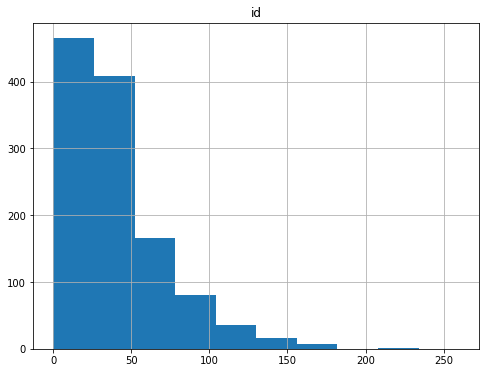

In [90]:
surf.hist(column='id',bins=10,range=(0,260),figsize=(8,6)) # histograma do numero de mensagens
surf['id'].median()

41.0

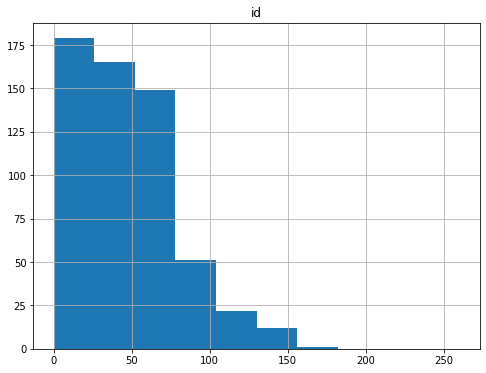

In [91]:
ultimate.hist(column='id',bins=10,range=(0,260),figsize=(8,6))
ultimate['id'].median()

A distribuição para os planos ultimate e surf são diferentes, sendo a distribuição do plano surf com uma mediana menor, os valores estão mais concentrados próximos a 50, depois ai rapidamente até próximo de 230 mensagens. No caso da distribuiçao do plano ultimate os valores vão ate 175 mas com uma queda menos acentuada, assim a mediana possue valores mais altos. 

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

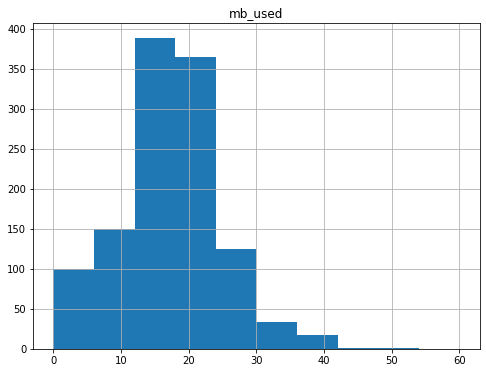

In [92]:
surf.hist(column='mb_used',bins=10,range=(0,60),figsize=(8,6)) # histograma da internet usada

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

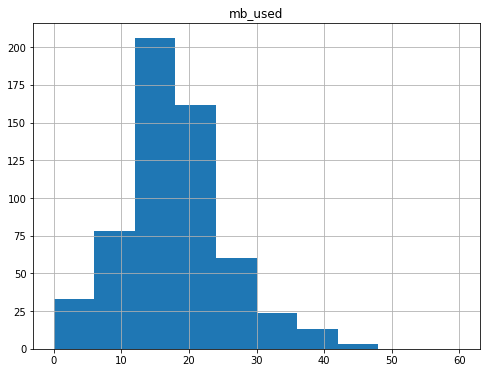

In [93]:
ultimate.hist(column='mb_used',bins=10,range=(0,60),figsize=(8,6))

Ambos tem um pico em torno de 15gb, esses graficos estão mais distribuidos

count    1180.000000
mean       60.415839
std        53.595739
min        20.000000
25%        20.022500
50%        41.035000
75%        80.232500
max       590.370000
Name: monthly_bill, dtype: float64

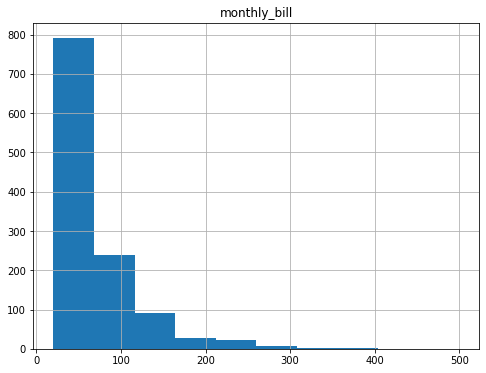

In [94]:
surf.hist(column='monthly_bill',bins=10,range=(20,500),figsize=(8,6))
surf['monthly_bill'].describe()

count    579.000000
mean     113.310812
std       56.991055
min       70.000000
25%       70.360000
50%       90.000000
75%      130.510000
max      380.690000
Name: monthly_bill, dtype: float64

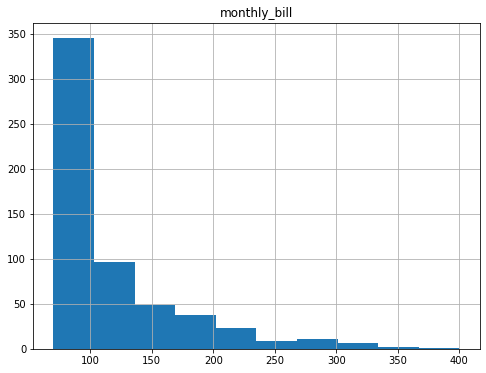

In [95]:
ultimate.hist(column='monthly_bill',bins=10,range=(70,400),figsize=(8,6))
ultimate['monthly_bill'].describe()

As distribuições de internet e ligações se assemelham a uma distribuição normal, no entanto a distribuição dos valores das contas e de mensagens são semelhantes a uma lei de potências.

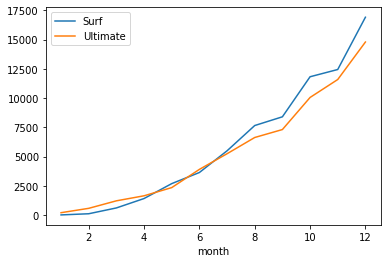

In [96]:
plt.figure()
surf.groupby('month')['monthly_bill'].sum().plot(label='Surf')
ultimate.groupby('month')['monthly_bill'].sum().plot(label='Ultimate')
plt.legend();

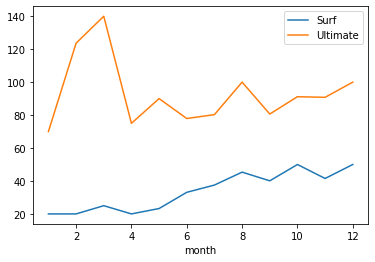

In [97]:
plt.figure()
surf.groupby('month')['monthly_bill'].median().plot(label='Surf')
ultimate.groupby('month')['monthly_bill'].median().plot(label='Ultimate')
plt.legend();

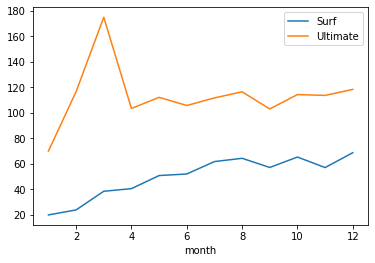

In [98]:
plt.figure()
surf.groupby(['month'])['monthly_bill'].mean().plot(label='Surf')
ultimate.groupby(['month'])['monthly_bill'].mean().plot(label='Ultimate')
plt.legend()

## Testando hipóteses <a id='ttest'></a>

In [99]:
from scipy.stats import ttest_ind

Uma das hipóteses que testaremos será: 

**- A receita média dos usuários dos planos Ultimate e Surf são diferentes.**

Utilizaremos embasamento estatístico para isso.

Vamos testar a hipótese da receita média dos usuários dos planos Ultimate e Surf serem diferentes ou não.
Caso seja igual o tteste indicará e receberemos uma mensagem com 'Não podemos rejeitar a hipotese nula.', caso contrário indicara que Podemos rejeitar a hipotese ser nula (ou seja, há diferença!).

In [100]:
avg_revenue_user_surf = surf.groupby(['user_id', 'month'])['monthly_bill'].mean()
avg_revenue_user_ultimate = ultimate.groupby(['user_id', 'month'])['monthly_bill'].mean()

alpha = 0.05

p_val = ttest_ind(avg_revenue_user_surf, avg_revenue_user_ultimate).pvalue

if p_val < alpha:
    print('Podemos rejeitar a hipotese nula.') # a receita média dos dois planos tem diferença
else:
    print('Não podemos rejeitar a hipotese nula.') # a receita média dos planos não tem diferença significativa

Podemos rejeitar a hipotese nula.


- **A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.**

Neste caso, precisamos primeiro encontrar os dados para os usuários da região de interesse e os dados dos outros usuários, separar esses dados e depois fazer o teste.

In [101]:
user_area_of_interest = df_users[df_users['city'].str.contains('NY-NJ')]['user_id']
user_others = df_users[~df_users['city'].str.contains('NY-NJ')]['user_id']

df_area = pd.concat([surf, ultimate])

nynj_area = df_area[df_area['user_id'].isin(user_area_of_interest)]
other_areas = df_area[~df_area['user_id'].isin(user_area_of_interest)]

len(nynj_area), len(other_areas)

(279, 1480)

Vamos testar a hipótese dos usuários da região NY-NJ serem diferentes das outras regiões. 
Vamos usar o ttest estatistico para isso. Caso seja igual receberemos uma mensagem com 'Não podemos rejeitar a hipotese nula.', caso contrário indicara que Podemos rejeitar a hipotese ser nula (ou seja, há diferença!).

In [102]:
monthly_nynj_bill = nynj_area.groupby('month')['monthly_bill'].mean()
monthly_others_bill = other_areas.groupby('month')['monthly_bill'].mean()

alpha = 0.05

p_val = ttest_ind(monthly_nynj_bill, monthly_others_bill).pvalue

if p_val < alpha:
    print('Podemos rejeitar a hipotese nula.') # há diferenças entre as faturas das pessoas que 
                                               # vivem em NY-NJ e outros de outras regiões
else:
    print('Não podemos rejeitar a hipotese nula.')  # Não ha diferença entre as faturas das diferentes regiões

Podemos rejeitar a hipotese nula.


In [103]:
monthly_nynj_bill.describe()

count    11.000000
mean     59.286527
std      18.824584
min      20.000000
25%      48.791735
50%      65.890000
75%      73.569461
max      79.274872
Name: monthly_bill, dtype: float64

In [104]:
monthly_others_bill.describe()

count    12.000000
mean     76.278503
std       9.880850
min      57.500000
25%      71.940066
50%      75.633370
75%      82.196371
max      92.472778
Name: monthly_bill, dtype: float64

De acordo com as hipóteses testadas através do ttest two sided. Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Vamos descobrir se existem diferenças significativas na receita dos planos para a Megaline, faremos um tteste. Caso a hipótese seja rejeitada significa que há diferenças, no caso testaremos se receita do plano surf é maior com base nos valores indicados pelas médias. caso contrário a hipótese nula não poderá ser rejeitada. 

In [109]:
revenue_surf = surf.groupby('month')['monthly_bill'].sum()
revenue_ultimate = ultimate.groupby('month')['monthly_bill'].sum()

print(revenue_surf.mean(),revenue_ultimate.mean()) # vamos testar se a receita do plano surf é maior

alpha = 0.05

p_val = ttest_ind(revenue_surf, revenue_ultimate).pvalue
 
if p_val < alpha:
    print('Podemos rejeitar a hipotese nula.')
else:
    print('Não podemos rejeitar a hipotese nula.')

5940.890833333334 5467.246666666667
Não podemos rejeitar a hipotese nula.


## Conclusão geral: <a id='conclusao'></a>

Neste projeto analisamos dois planos da empresa Megaline com o intuito de descobrir diferenças entre os planos.
Testamos algumas hipóteses sobre o plano Surf e Ultimate. Verificamos que as médias são diferentes, também
    verificamos que usuários de diferentes regiões (NY-NJ e outros) tem faturas com valores diferentes. 
No plot da receita mensal de cada um dos planos podemos ver que as linhas se interceptão 3 vezes e tendem ao um comportamento exponencial parecido. Por isso verificamos através do teste estatístico se o plano Surf tem uma receita maior para a empresa do que o plano Ultimate. Formulei esta hipótese com base na diferença das médias da fatura mensal. De acordo com o teste não podemos afirmar que um plano rende consistente mais que o outro.